In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

In [22]:
# Load dataset
data = pd.read_csv('data/spotify_cleaned.csv')
print(data.info())

# Feature columns
feature_cols = [
    "danceability",
    "energy",
    "valence",
    "tempo",
    "acousticness",
    "instrumentalness",
    "liveness",
    "speechiness",
    "loudness"
]

target_col = [
    "playlist_genre"
]

# Split features and target
X = data[feature_cols]
y = data[target_col]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape}, Testing set size: {X_test.shape}")
print(f"Training labels size: {y_train.shape}, Testing labels size: {y_test.shape}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19419 entries, 0 to 19418
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  19419 non-null  object 
 1   track_name                19419 non-null  object 
 2   track_artist              19419 non-null  object 
 3   track_popularity          19419 non-null  int64  
 4   track_album_id            19419 non-null  object 
 5   track_album_name          19419 non-null  object 
 6   track_album_release_date  19419 non-null  object 
 7   playlist_name             19419 non-null  float64
 8   playlist_id               19419 non-null  object 
 9   playlist_genre            19419 non-null  object 
 10  playlist_subgenre         19419 non-null  float64
 11  danceability              19419 non-null  float64
 12  energy                    19419 non-null  float64
 13  key                       19419 non-null  int64  
 14  loudne

c:\Users\Aaron\anaconda3\envs\gpu-kernel\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


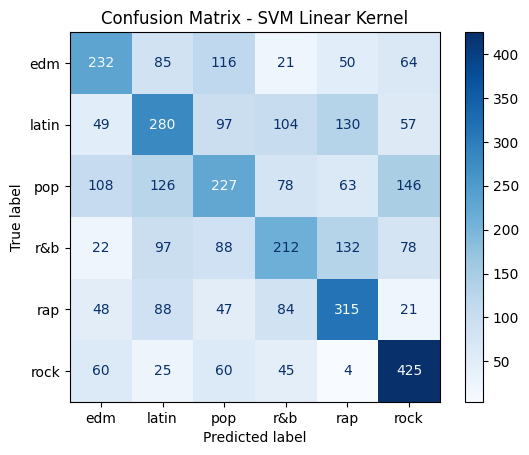

SVM Linear Kernel - Accuracy: 0.4354
SVM Linear Kernel - Precision: 0.4272
SVM Linear Kernel - Recall: 0.4354
SVM Linear Kernel - F1 Score: 0.4286


In [23]:
# Train SVM with linear kernel in a pipeline
svm_linear = SVC(kernel='linear', C=4.0, random_state=42)
pipeline_linear = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', svm_linear)
])

# Fit the model
pipeline_linear.fit(X_train, y_train)

# Predict on the test set
y_pred_linear = pipeline_linear.predict(X_test)

# Evaluate the model
cm_linear = confusion_matrix(y_test.values.ravel(), y_pred_linear)
display_cm_linear = ConfusionMatrixDisplay(confusion_matrix=cm_linear, display_labels=['edm', 'latin', 'pop', 'r&b', 'rap', 'rock'])
display_cm_linear.plot(cmap='Blues')
plt.title('Confusion Matrix - SVM Linear Kernel')
plt.show()

# Calculate and print evaluation metrics
accuracy_linear = accuracy_score(y_test.values.ravel(), y_pred_linear)
precision_linear = precision_score(y_test.values.ravel(), y_pred_linear, average='weighted')
recall_linear = recall_score(y_test.values.ravel(), y_pred_linear, average='weighted')
f1_linear = f1_score(y_test.values.ravel(), y_pred_linear, average='weighted')

print(f"SVM Linear Kernel - Accuracy: {accuracy_linear:.4f}")
print(f"SVM Linear Kernel - Precision: {precision_linear:.4f}")
print(f"SVM Linear Kernel - Recall: {recall_linear:.4f}")
print(f"SVM Linear Kernel - F1 Score: {f1_linear:.4f}") 

c:\Users\Aaron\anaconda3\envs\gpu-kernel\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


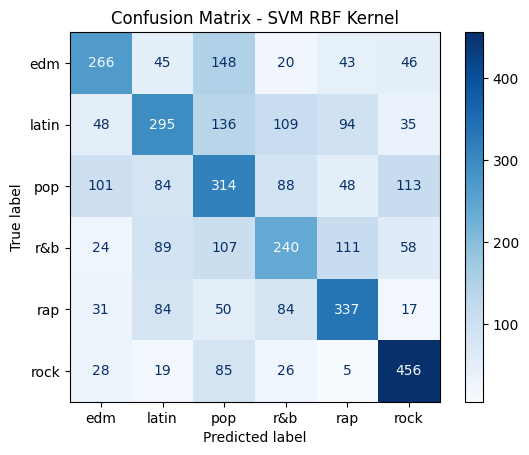

SVM RBF Kernel - Accuracy: 0.4912
SVM RBF Kernel - Precision: 0.4893
SVM RBF Kernel - Recall: 0.4912
SVM RBF Kernel - F1 Score: 0.4883


In [24]:
# Train SVM with RBF kernel in a pipeline
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
pipeline_rbf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', svm_rbf)
])

# Fit the model
pipeline_rbf.fit(X_train, y_train)

# Predict on the test set
y_pred_rbf = pipeline_rbf.predict(X_test)

# Evaluate the model
cm_rbf = confusion_matrix(y_test.values.ravel(), y_pred_rbf)
display_cm_rbf = ConfusionMatrixDisplay(confusion_matrix=cm_rbf, display_labels=['edm', 'latin', 'pop', 'r&b', 'rap', 'rock'])
display_cm_rbf.plot(cmap='Blues')
plt.title('Confusion Matrix - SVM RBF Kernel')
plt.show()

# Calculate and print evaluation metrics
accuracy_rbf = accuracy_score(y_test.values.ravel(), y_pred_rbf)
precision_rbf = precision_score(y_test.values.ravel(), y_pred_rbf, average='weighted')
recall_rbf = recall_score(y_test.values.ravel(), y_pred_rbf, average='weighted')
f1_rbf = f1_score(y_test.values.ravel(), y_pred_rbf, average='weighted')

print(f"SVM RBF Kernel - Accuracy: {accuracy_rbf:.4f}")
print(f"SVM RBF Kernel - Precision: {precision_rbf:.4f}")
print(f"SVM RBF Kernel - Recall: {recall_rbf:.4f}")
print(f"SVM RBF Kernel - F1 Score: {f1_rbf:.4f}") 

In [25]:
# Compare the results of both kernels
print("\nComparison of SVM Kernels:")
print(f"{'Metric':<10} {'Linear Kernel':<15} {'RBF Kernel':<15}")
print(f"{'Accuracy':<10} {accuracy_linear:<15.4f} {accuracy_rbf:<15.4f}")
print(f"{'Precision':<10} {precision_linear:<15.4f} {precision_rbf:<15.4f}")
print(f"{'Recall':<10} {recall_linear:<15.4f} {recall_rbf:<15.4f}")
print(f"{'F1 Score':<10} {f1_linear:<15.4f} {f1_rbf:<15.4f}")


Comparison of SVM Kernels:
Metric     Linear Kernel   RBF Kernel     
Accuracy   0.4354          0.4912         
Precision  0.4272          0.4893         
Recall     0.4354          0.4912         
F1 Score   0.4286          0.4883         


In [26]:
# Clean row indices
data = data.reset_index(drop=True)

# Rebuild X to match the reset index
X = data[feature_cols]

# Use trained SVM-RBF model to predict on the entire dataset
data['svm_rbf_prediction'] = pipeline_rbf.predict(X)

print(data[['playlist_genre', 'svm_rbf_prediction']].head())

  playlist_genre svm_rbf_prediction
0            pop                pop
1            pop                pop
2            pop                pop
3            pop                edm
4            pop                pop


Combining SVM with KNN to use genre predictions for song recommendations

In [27]:
from sklearn.neighbors import NearestNeighbors

In [28]:
# Reused scaler from the RBF pipeline
scaler_rbf = pipeline_rbf.named_steps['scaler']
X_scaled = scaler_rbf.transform(X)

# Neighbor finder
nn_model = NearestNeighbors(
    n_neighbors=50,
    metric='euclidean'
)
nn_model.fit(X_scaled)

,n_neighbors,50
,radius,1.0
,algorithm,'auto'
,leaf_size,30
,metric,'euclidean'
,p,2
,metric_params,None
,n_jobs,None


In [29]:
def find_song_indices(df, track_name=None, track_artist=None):
    mask = pd.Series(True, index=df.index)

    if track_name is not None:
        mask &= df["track_name"].str.contains(
            track_name,
            case=False,
            na=False,
            regex=False,   
        )

    if track_artist is not None:
        mask &= df["track_artist"].str.contains(
            track_artist,
            case=False,
            na=False,
            regex=False,
        )

    return df[mask].index.tolist()


In [30]:
# Hybrid SVM + KNN recommendation function
def recommend_svm_knn_global(song_queries, data, X_scaled, total_top_k=20):
    all_recs = []
    seen_pairs = set()

    # Collect ALL seed indices (to exclude them from recs)
    exclude_indices = []
    for q in song_queries:
        tname = q.get("track_name")
        aname = q.get("track_artist")
        matches = find_song_indices(data, track_name=tname, track_artist=aname)
        exclude_indices.extend(matches)
    exclude_indices = list(set(exclude_indices))

    # Generate candidates from each seed
    for q in song_queries:
        tname = q.get("track_name")
        aname = q.get("track_artist")

        seed_matches = find_song_indices(data, track_name=tname, track_artist=aname)
        if not seed_matches:
            print(f"No match found for: {tname} - {aname}")
            continue

        seed_idx = seed_matches[0]
        print(f"Recommendations for seed: {data.loc[seed_idx, 'track_name']} - {data.loc[seed_idx, 'track_artist']}")

        # SVM-predicted genre of this seed
        seed_genre = data.loc[seed_idx, "svm_genre_pred"]

        # Candidates = same svm_genre_pred
        mask = data["svm_genre_pred"] == seed_genre
        candidate_indices = data.index[mask].to_numpy()

        # Fallback: if almost empty, allow all songs
        if len(candidate_indices) <= 1:
            candidate_indices = data.index.to_numpy()

        # Remove all seed songs from candidates
        candidate_indices = np.array(
            [idx for idx in candidate_indices if idx not in exclude_indices]
        )

        if len(candidate_indices) == 0:
            print("No valid candidates (after excluding seeds).")
            continue

        # Local KNN around this seed
        X_candidates = X_scaled[candidate_indices]
        seed_vec = X_scaled[seed_idx].reshape(1, -1)

        # We never need more neighbors per seed than total_top_k
        n_neighbors = min(total_top_k, len(candidate_indices))

        local_nn = NearestNeighbors(
            n_neighbors=n_neighbors,
            metric="euclidean"
        )
        local_nn.fit(X_candidates)
        distances, neighbor_pos = local_nn.kneighbors(seed_vec)

        neighbor_df_indices = candidate_indices[neighbor_pos[0]]

        # Build recs for this seed
        cols_to_show = ["playlist_genre", "svm_genre_pred"]
        for c in ["track_name", "track_artist"]:
            if c in data.columns and c not in cols_to_show:
                cols_to_show.insert(0, c)

        recs = data.loc[neighbor_df_indices, cols_to_show].copy()
        recs["distance"] = distances[0][:len(recs)]

        # Deduplicate across all seeds
        for _, row in recs.iterrows():
            key = (row["track_name"], row["track_artist"])
            if key not in seen_pairs:
                seen_pairs.add(key)
                all_recs.append(row)

    if not all_recs:
        print("No recommendations available.")
        return pd.DataFrame()

    all_recs_df = pd.DataFrame(all_recs)

    # Apply global cap: keep closest songs overall
    all_recs_df = (
        all_recs_df.sort_values("distance")
                   .head(total_top_k)
                   .reset_index(drop=True)
    )

    return all_recs_df

In [31]:
# Compute cosine similarity score between user songs and recommended songs
def cosine_similarity_score(user_songs, recommended_songs):
    user_indices = []
    rec_indices = []
    for song in user_songs:
        tname = song.get("track_name")
        aname = song.get("track_artist")
        matches = find_song_indices(data, track_name=tname, track_artist=aname)
        if matches:
            user_indices.append(matches[0])
    for _, row in recommended_songs.iterrows():
        matches = find_song_indices(data, track_name=row["track_name"], track_artist=row["track_artist"])
        if matches:
            rec_indices.append(matches[0])
    if not user_indices or not rec_indices:
        return None
    user_vectors = X_scaled[user_indices]
    rec_vectors = X_scaled[rec_indices]
    sim_matrix = cosine_similarity(user_vectors, rec_vectors)
    return sim_matrix

In [32]:
# Create alias column for the recommendation function
data['svm_genre_pred'] = data['svm_rbf_prediction']

user_songs = [
    {"track_name": "Don't you forget about me", "track_artist": "Simple Minds"},
    {"track_name": "Don't stop believin'", "track_artist": "Journey"},
    {"track_name": "Tainted Love", "track_artist": "Soft Cell"},
    {"track_name": "Take on Me", "track_artist": "a-ha"},
    {"track_name": "Africa", "track_artist": "Toto"},
    {"track_name": "Eye of the Tiger", "track_artist": "Survivor"},
]

recs = recommend_svm_knn_global(
    song_queries=user_songs,
    data=data,
    X_scaled=X_scaled,
    total_top_k=10
)

display(recs)
# Calculate and print cosine similarity score mean for each recommended song
sim_matrix = cosine_similarity_score(user_songs, recs)
if sim_matrix is not None:
    sim_means = sim_matrix.mean(axis=0)
    for i, row in recs.iterrows():
        print(f"Recommendation: {row['track_name']} - {row['track_artist']}, Cosine Similarity Score Mean: {sim_means[i]:.4f}")


No match found for: Don't you forget about me - Simple Minds
Recommendations for seed: Don't Stop Believin' - Journey
Recommendations for seed: Tainted Love - Soft Cell
Recommendations for seed: Take on Me - a-ha
Recommendations for seed: Africa - TOTO
Recommendations for seed: Eye of the Tiger - Survivor


,track_artist,track_name,playlist_genre,svm_genre_pred,distance
0,Survivor,"Burning Heart - From ""Rocky IV"" Soundtrack",rock,rock,0.872384
1,Aerosmith,Last Child,rock,rock,0.923947
2,Color Me Badd,I Adore Mi Amor,r&b,rock,1.068138
3,Queen,Long Away - Remastered 2011,rock,rock,1.081749
4,Aerosmith,Same Old Song and Dance,rock,rock,1.084523
5,Gloria Estefan,Tus Ojos,latin,rock,1.135617
6,Ysy A,Vuelta a la Luna - Remix,rap,rock,1.184909
7,Wave Wave,Shot,latin,rock,1.201821
8,オメガトライブ,Trade Wind,rock,rock,1.218873
9,Dave Mason,Feelin' Alright - Live at Universal Amphitheat...,rock,rock,1.301173


Recommendation: Burning Heart - From "Rocky IV" Soundtrack - Survivor, Cosine Similarity Score Mean: 0.3547
Recommendation: Last Child - Aerosmith, Cosine Similarity Score Mean: 0.3883
Recommendation: I Adore Mi Amor - Color Me Badd, Cosine Similarity Score Mean: 0.4352
Recommendation: Long Away - Remastered 2011 - Queen, Cosine Similarity Score Mean: 0.1913
Recommendation: Same Old Song and Dance - Aerosmith, Cosine Similarity Score Mean: 0.3007
Recommendation: Tus Ojos - Gloria Estefan, Cosine Similarity Score Mean: 0.4108
Recommendation: Vuelta a la Luna - Remix - Ysy A, Cosine Similarity Score Mean: 0.0961
Recommendation: Shot - Wave Wave, Cosine Similarity Score Mean: 0.4100
Recommendation: Trade Wind - オメガトライブ, Cosine Similarity Score Mean: 0.4427
Recommendation: Feelin' Alright - Live at Universal Amphitheater, Los Angeles, CA - 1975 - Dave Mason, Cosine Similarity Score Mean: 0.2000


In [33]:
import random 
# Backtest playlist
def backtest_playlist(playlistname, seed=.8, n_rec=10):
    # Load playlist data with error handling for malformed CSV
    playlist_df = pd.read_csv('data/spotify_playlists.csv', on_bad_lines='skip', engine='python')

    # List of tuples (track_name, track_artist) for all songs in the playlist
    playlist_songs = list(
        playlist_df[playlist_df['playlistname'] == playlistname][['trackname', 'artistname']].itertuples(index=False, name=None)
    )

    songCount = len(playlist_songs)
    
    # Remove songs not in data
    valid_songs = []
    for track_name, track_artist in playlist_songs:
        matches = find_song_indices(data, track_name=track_name, track_artist=track_artist)
        if matches:
            valid_songs.append((track_name, track_artist))

    validCount = len(valid_songs)

    # remove seed songs randomly
    seed_songs = random.sample(valid_songs, min(int(np.floor(validCount*seed)), validCount))

    # remove seed songs from valid songs
    for song in seed_songs:
        valid_songs.remove(song)

    # Prepare song queries for recommendation
    song_queries = [
        {"track_name": track_name, "track_artist": track_artist}
        for track_name, track_artist in seed_songs
    ]

    recs = recommend_svm_knn_global(
        song_queries=song_queries,
        data=data,
        X_scaled=X_scaled,
        total_top_k=n_rec
    )

    display(recs)

    # Print summary
    print(f"\nBacktest Summary for Playlist: {playlistname}")
    print(f"Total songs in playlist: {songCount}")
    print(f"Valid songs in dataset: {validCount}")
    print(f"Seed songs used: {len(seed_songs)}")
    print(f"Recommendations generated: {len(recs)}")

    # Calculate how many recommendations were actually in the original playlist
    rec_in_playlist = 0
    for _, row in recs.iterrows():
        if (row['track_name'], row['track_artist']) in valid_songs:
            rec_in_playlist += 1


    print(f"Recommendations in original playlist: {rec_in_playlist}")

In [34]:
backtest_playlist('Songs I Need', .8, 50)

Recommendations for seed: Yellow - Coldplay
Recommendations for seed: The Drugs Don't Work - The Verve
Recommendations for seed: One - U2
Recommendations for seed: Paranoid Android - Remastered - Radiohead
Recommendations for seed: American Girl - Tom Petty and the Heartbreakers
Recommendations for seed: Just Give Me a Reason (feat. Nate Ruess) - P!nk
Recommendations for seed: Grace - Jeff Buckley
Recommendations for seed: I Still Haven't Found What I'm Looking For - U2
Recommendations for seed: Use Somebody - Kings of Leon
Recommendations for seed: I Knew You Were Trouble. - Taylor Swift
Recommendations for seed: Every Breaking Wave - U2
Recommendations for seed: Young And Beautiful [Lana Del Rey vs. Cedric Gervais] - Cedric Gervais Remix Radio Edit - Lana Del Rey
Recommendations for seed: Criminal - Fiona Apple
Recommendations for seed: Rolling in the Deep - Adele
Recommendations for seed: Any Way You Want It - Journey
Recommendations for seed: Mary Jane's Last Dance - Tom Petty and 

,track_artist,track_name,playlist_genre,svm_genre_pred,distance
0,Maroon 5,Doin’ Dirt,pop,pop,0.400067
1,Billy Talent,Fallen Leaves,rock,pop,0.486559
2,Gloria Estefan,I See Your Smile,latin,rock,0.544723
3,Afrojack,The Spark,edm,pop,0.706037
4,Manolito Simonet y su Trabuco,Locos por Mi Habana - Remasterizado,r&b,latin,0.737655
5,Alex McArtor,Heart Talk,rock,rock,0.757130
6,Charlie Puth,Mother - Fedde Le Grand Remix,pop,edm,0.760536
7,Ally Brooke,No Good,r&b,pop,0.760992
8,Motörhead,Hellraiser,rock,rock,0.765360
9,Dez Money,I Want Your Love,rock,rock,0.772850



Backtest Summary for Playlist: Songs I Need
Total songs in playlist: 367
Valid songs in dataset: 52
Seed songs used: 41
Recommendations generated: 50
Recommendations in original playlist: 0


In [35]:
backtest_playlist('chill out', .8, 50)

Recommendations for seed: Hey Mr. D.J. - Zhané
Recommendations for seed: Regulate - Warren G
Recommendations for seed: Summertime - DJ Jazzy Jeff & The Fresh Prince
Recommendations for seed: Waves - Robin Schulz Radio Edit - Mr. Probz
Recommendations for seed: Midnight at the Oasis - Maria Muldaur
Recommendations for seed: Can't Take My Eyes off You - Frankie Valli
Recommendations for seed: Too Young - Phoenix
Recommendations for seed: Hold On, We're Going Home - Drake
Recommendations for seed: Rhythm Of The Night - DeBarge
Recommendations for seed: Hold the Line - TOTO
Recommendations for seed: Saturday in the Park - 2002 Remaster - Chicago
Recommendations for seed: Man Down - Rihanna
Recommendations for seed: It Was A Good Day - Ice Cube
Recommendations for seed: White Rabbit - Jefferson Airplane
Recommendations for seed: Passin' Me By - The Pharcyde
Recommendations for seed: Girls and Boys - Blur
Recommendations for seed: Smooth Operator - Remastered - Sade
Recommendations for seed:

,track_artist,track_name,playlist_genre,svm_genre_pred,distance
0,The Pharcyde,Passing Me By,r&b,rap,0.188355
1,Jack & Jack,No One Compares To You,pop,pop,0.644940
2,Miss Jones,Where I Wanna Be Boy,r&b,r&b,0.698205
3,Belinda Carlisle,Heaven Is a Place on Earth,pop,rock,0.761882
4,J Alvarez,Deja (feat. Nejo Y Dalmata),latin,latin,0.788825
5,Chato 473,Mujer Fría,rap,rap,0.821856
6,Dove Cameron,Better in Stereo - Theme Song Version,pop,latin,0.829504
7,Stevie Nicks,Edge of Seventeen - 2016 Remaster,rock,rock,0.879683
8,Paperwhite,Count On You,pop,pop,0.890591
9,Potyguara Bardo,Você Não Existe,latin,rock,0.892827



Backtest Summary for Playlist: chill out
Total songs in playlist: 204
Valid songs in dataset: 23
Seed songs used: 18
Recommendations generated: 50
Recommendations in original playlist: 0
